In [2]:
import matplotlib.pyplot as plt
import scipy.constants as cns
import math




In [3]:
#find beta
def findBeta(fBy):
    fB=fBy/(math.sqrt(1+(fBy*fBy)))
    return fB

#Bethe Block from Quantum
def CalcBethQuant(ne,Z,m,I,By,density=-1):
    #finding beta
    B=findBeta(By) 
    #For Simplification 
    K=Z/B
    U=(2*m*By*By*3e+8*3e+8)/I   #Dont Cancel the c^2 with MeV/c^2 (which comes from mass)
    C=math.log(U)-(B*B)
    #Getting the dedx
    fdedx=De*K*K*ne*C
    if(density>0):
        fdedx=fdedx/density #MeV*cm^2/g
    
    return fdedx # if density provided MeV*cm^2/g else MeV/cm

#Bethe Block from Classical
def CalcBethClass(ne,Z,m,I,By,density=-1):
    #finding beta
    B=findBeta(By)   
    #For Simplification 
    K=Z/B
    U=2*m*By*By*3e+8*3e+8
    #Getting the dedx
    fdedx=De*(K*K)*ne*(math.log(U/I)-math.log(B))
    if(density>0):
        fdedx=(fdedx/density) #MeV*cm^2/g
    
    return fdedx # if density provided MeV*cm^2/g else MeV/cm

#Some Constants
''' Z = Atomic Numbr 
  ne = Electron density = (Avg*density)/Atomicmass
  B=v/c
  By=p/m
  I= Mean Ionization Energy
  De =4pi*(re)^2*m*c^2
'''

De=5.0989e-25 #MeV cm2
Avogadro=cns.Avogadro #atoms/mole
c=3e+8 #speed of ligh m/s^2
me=0.5  #Electron's Mass MeV/c^2  
M=938 #Proton's Mass MeV/c^2 
Mu=105 #Muon's Mass MeV/c^2


2.462457204353382e+24


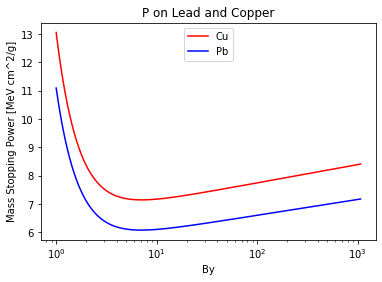

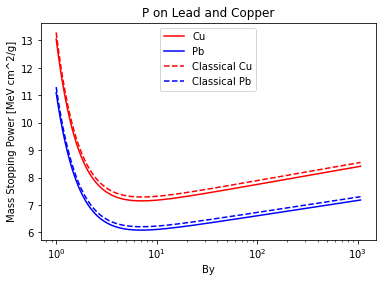

In [4]:
#Homework 2 Part a,c

#for Copper
ICu=322e-6 #MeV
Cu_density=8.96 #g/cm3
Cu_Amass=63.546 #g/mole
Cu_Z=29
ne_Cu=(Avogadro*Cu_Z*Cu_density)/Cu_Amass
Cuby=[]
Cudepdx=[]
C_Cuby=[]
C_Cudepdx=[]


#for Lead
IPb=823e-6 #eV
Pb_density=11.4 #g/cm3
Pb_Amass=207.2 #g/mole
Pb_Z=82
ne_Pb=(Avogadro*Pb_Z*Pb_density)/Pb_Amass
Pbby=[]
Pbdepdx=[]
C_Pbby=[]
C_Pbdepdx=[]

print(ne_Cu)
for x in range(M,1000000):
    by=x/M
    #Loop on Pb Quantum
    Pbby.append(by)
    dedx=CalcBethQuant(ne_Pb,1,me,IPb,by,Pb_density)
    Pbdepdx.append(dedx)
    
    #Pb Classical
    C_Pbby.append(by)
    dedx=CalcBethClass(ne_Pb,1,me,IPb,by,Pb_density)
    C_Pbdepdx.append(dedx)
    
    #Cu Quantum
    Cuby.append(by)
    dedx=CalcBethQuant(ne_Cu,1,me,ICu,by,Cu_density)
    Cudepdx.append(dedx)
    
    #Cu Classical
    C_Cuby.append(by)
    dedx=CalcBethClass(ne_Cu,1,me,ICu,by,Cu_density)
    C_Cudepdx.append(dedx)

#Quantum Graphs only
plt.plot(Cuby,Cudepdx,'k',label='Cu',color='r')
ax=plt.gca()
plt.legend(loc='upper center')
ax.set_xscale('log')
plt.title('P on Lead and Copper')
plt.ylabel('Mass Stopping Power [MeV cm^2/g]')
plt.xlabel('By')       
plt.plot(Pbby,Pbdepdx,'k',label='Pb',color='blue')
plt.legend(loc='upper center')
plt.show()

#Quantum and Classical Graphs only
plt.plot(Cuby,Cudepdx,'k',label='Cu',color='r')
ax=plt.gca()
plt.legend(loc='upper center')
ax.set_xscale('log')
plt.title('P on Lead and Copper')
plt.ylabel('Mass Stopping Power [MeV cm^2/g]')
plt.xlabel('By') 
    
plt.plot(Pbby,Pbdepdx,'k',label='Pb',color='blue')
plt.legend(loc='upper center')
plt.plot(C_Cuby,C_Cudepdx,'k--',label='Classical Cu',color='r')
plt.legend(loc='upper center')
plt.plot(C_Pbby,C_Pbdepdx,'k--',label='Classical Pb',color='blue')
plt.legend(loc='upper center')


plt.show()

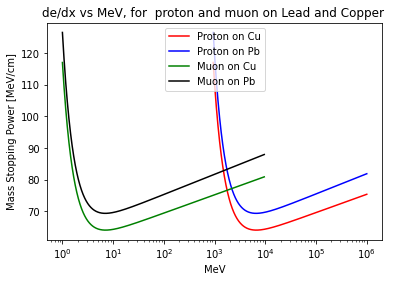

In [4]:
#Homework 2 Part d
#for Copper
ICu=322e-6 #Ionization mean energy MeV
Cu_density=8.96 #g/cm3
Cu_Amass=63.546 #g/mole
Cu_Z=29  #Atomic Number
ne_Cu=(Avogadro*Cu_Z*Cu_density)/Cu_Amass #Electron density

Cuby=[]
Cudepdx=[]
C_Cuby=[]
C_Cudepdx=[]




#for Lead
IPb=823e-6 #Ionization mean energy MeV
Pb_density=11.4 #g/cm3
Pb_Amass=207.2 #g/mole
Pb_Z=82  #Atomic Number
ne_Pb=(Avogadro*Pb_Z*Pb_density)/Pb_Amass #Electron density
Pbby=[]
Pbdepdx=[]
C_Pbby=[]
C_Pbdepdx=[]


#For Proton
for x in range(M,1000000):
    by=x/M
    Pbby.append(x)
    dedx=CalcBethQuant(ne_Pb,1,me,IPb,by)
    Pbdepdx.append(dedx)
    
    Cuby.append(x)
    dedx=CalcBethQuant(ne_Cu,1,me,ICu,by)
    Cudepdx.append(dedx)

#For Muon    
for x in range(Mu,1000000):
    
    by=x/Mu
    C_Pbby.append(by)
    dedx=CalcBethQuant(ne_Pb,1,me,IPb,by)
    C_Pbdepdx.append(dedx)
    
    C_Cuby.append(by)
    dedx=CalcBethQuant(ne_Cu,1,me,ICu,by)
    C_Cudepdx.append(dedx)

plt.plot(Cuby,Cudepdx,'k',label='Proton on Cu',color='r')
plt.legend(loc='upper center')
ax=plt.gca()
ax.set_xscale('log')
plt.title('de/dx vs MeV, for  proton and muon on Lead and Copper ')
plt.ylabel('Mass Stopping Power [MeV/cm]')
plt.xlabel('MeV')   
    
plt.plot(Pbby,Pbdepdx,'k',label='Proton on Pb',color='blue')
plt.legend(loc='upper center')


plt.plot(C_Cuby,C_Cudepdx,'k',label='Muon on Cu',color='g')
plt.legend(loc='upper center')
    
plt.plot(C_Pbby,C_Pbdepdx,'k',label='Muon on Pb',color='black')
plt.legend(loc='upper center')

plt.show()

In [5]:

# Homework 3
#for Ar
IAr=187e-6 #MeV
Ar_density=1.73e-3 #g/cm3
Ar_Amass=40 #g/mole
Ar_Z=18
ne_Ar=(Avogadro*Ar_Z*Ar_density)/Ar_Amass
by=(60e3)/Mu
dedx=CalcBethQuant(ne_Ar,1,me,IAr,by)
print("dedx[MeV/cm]= " + str(dedx))
print("1.3cm*dedx[MeV]= " +str(1.3*dedx)) # Answer to Particle energy in MeV)) # Answer to Particle energy in MeV


dedx[MeV/cm]= 0.014180225660675925
1.3cm*dedx[MeV]= 0.018434293358878702


4.0
39.191835884530846
Dr Jone's way


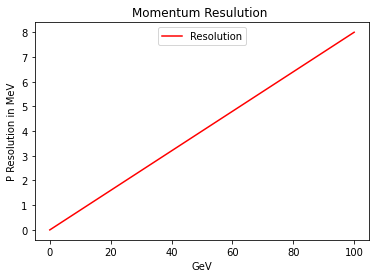

the way I found


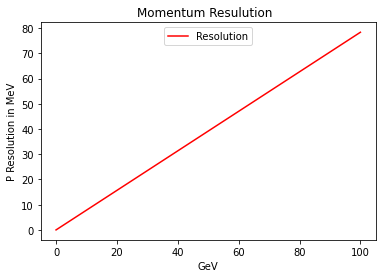

In [16]:
#Homework4
def MomentResDrJones(p,d,pitch):
    res=(p*pitch)/d
    return res
def MomentRes(p,d,pitch):
    top=math.sqrt(3/2)*pitch*8*p
    bottom=d
    res=(top/bottom)
    return res

x1=[]
y1=[]

x2=[]
y2=[]
pitch=200e-6 #m
d=2.5 #m

for p in range(1,100000):
    res=MomentResDrJones(p,d,pitch)
    res2=MomentRes(p,d,pitch)
    if(p==50000):
        print(res)
        print (res2)
    y1.append(res)
    x1.append(p/1000)
    y2.append(res2)
    x2.append(p/1000)
#Dr Jone's Way 
print("Dr Jone's way")
plt.plot(x1,y1,'k',label='Resolution',color='r')
plt.title('Momentum Resulution ')
plt.legend(loc='upper center')
ax.set_yscale('log')
plt.ylabel('P Resolution in MeV')
plt.xlabel('GeV')   
plt.show()

print("the way I found")
#The way I found
plt.plot(x2,y2,'k',label='Resolution',color='r')
plt.title('Momentum Resulution  ')
plt.legend(loc='upper center')
ax.set_yscale('log')
plt.ylabel('P Resolution in MeV')
plt.xlabel('GeV')   
plt.show()